/Users/take/.pyenv/versions/anaconda3-4.4.0/envs/ml/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


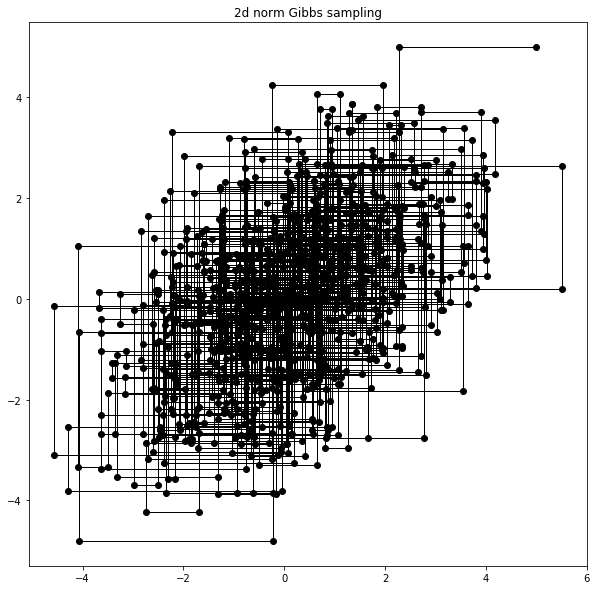

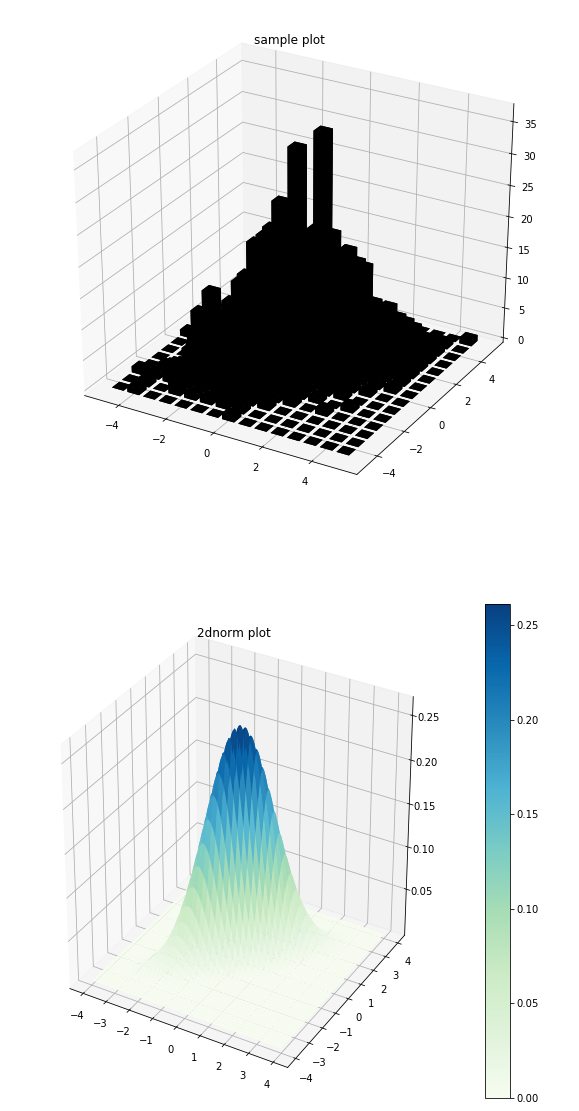

In [13]:
#2次元正規分布のサンプリング(ギプスサンプリング)を用いた
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import norm,uniform,multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

maxSample = 1000

x = [5.0]
y = [5.0]
# sigma1 = sigma2 = 1,mean1 = mean2 = 0 の2つの標準正規分布からのサンプル。
#ただし、共分散 cov の値によって、グラフが変化する。
sigma = 0.8
for i in range(2*maxSample):
    x.append(norm.rvs(loc=sigma*y[-1],scale=1.0))
    y.append(norm.rvs(loc=sigma*x[-1],scale=1.0))
    
x = x[2::4]
y = y[4::4]
x1 = [5.0]
x2 = [5.0,5.0]
for i in range(len(y)):
    x1.extend([x[i]]*2)
    x2.extend([y[i]]*2)
if len(x1) < len(x2):
    x1.append(x1[-1])
elif len(x1) > len(x2):
    x2.append(x2[-1])

plt.figure(figsize=(10,10))
plt.subplot(111)
plt.title('2d norm Gibbs sampling')
plt.plot(x1,x2,color='black',  linestyle='solid', linewidth = 1.0, marker='o')

hist, xedges, yedges = np.histogram2d(x1, x2, bins=15, range=[[-5, 5], [-5, 5]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(211, projection='3d')
ax.set_title('sample plot')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='black', zsort='average')

x1 = np.linspace(-4, 4, 800)
x2 = np.linspace(-4, 4, 800)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y_plot = multivariate_normal.pdf(x=X,mean=np.zeros(2),cov=[[1,sigma],[sigma,1]])
Y_plot = Y_plot.reshape(X1.shape)
ax = fig.add_subplot(212, projection='3d')
surf = ax.plot_surface(X1, X2, Y_plot, cmap='GnBu', linewidth=0)
fig.colorbar(surf)
ax.set_title("2dnorm plot")
fig.show()


